<a href="https://colab.research.google.com/github/koad7/NLP_PYTORCH/blob/main/Unsupervised_NER_With_embedding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!pip install transformers

In [6]:
from transformers import BertTokenizer, BertModel
import torch

# Load pre-trained model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

# Function to convert sentences to embeddings
def sentence_to_embedding(sentence):
    # Tokenize the sentence
    inputs = tokenizer(sentence, return_tensors='pt')

    # Get the embeddings
    with torch.no_grad():
        outputs = model(**inputs)

    # The embeddings of the [CLS] token can be used as the embedding of the sentence
    sentence_embedding = outputs.last_hidden_state[0, 0, :].numpy()

    return sentence_embedding

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [7]:
from sklearn.cluster import KMeans
import numpy as np




In [74]:
sentence = '''When Jack Ma was allocating company shares, he gave Tong 0.2% shares right saying it will worth 100 million when Alibaba goes public into the market later. He asked her to stay in the company, not change to other companies, and she will get 100 million when Alibaba goes public.
She waited years but Alibaba never went public. She asked Jack when will Alibaba go public in 2004 and Jack said soon. She asked again in 2006 and Jack Ma said soon, again.
However, she never saw it happen and never got 100 million. When Alibaba finally went public on the New York Stock Exchange in September 2014, it was worth 245.7 billion. Tong, the former senior receptionist, and current Vice President of Alibaba, became a millionaire from a receptionist with 320 million worth.
Entrepreneurship is a 16-character word where the 6th letter P stands for Patience. Most startups end in this 6th stage because of a lack of patience.
Whenever I am going to give up my dreams I read this story when a receptionist has this much patience then how can I give up, I am born to be an Entrepreneur.'''

def count_words(text):
    words = text.split()
    return len(words)
print(f'We have {count_words(sentence)} total number of words.')
# Tokenize the sentence and get the corresponding input IDs
inputs = tokenizer(sentence, return_tensors="pt")

# Get the embeddings
with torch.no_grad():
    outputs = model(**inputs)

# The embeddings are stored in the last hidden state
embeddings = outputs.last_hidden_state

We have 193 total number of words.


In [75]:
embeddings.size()

torch.Size([1, 237, 768])

In [76]:
import numpy as np

# Transofmr tensor from 3D to 2D
embeddings_2d = embeddings.view(embeddings.size(1), -1)
# Initialize a KMeans object with 2 clusters (for 2 classes: NE and non-NE)
kmeans = KMeans(n_clusters=2, random_state=0)


In [77]:
# Now fit the KMeans model
labels = kmeans.fit_predict(embeddings_2d)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [78]:
print(f'Total siez: {labels.size} \n0: {np.count_nonzero(labels)}\n1: {labels.size-np.count_nonzero(labels)}')


Total siez: 237 
0: 176
1: 61


In [79]:
count_0 = labels.size-np.count_nonzero(labels)
count_1 = np.count_nonzero(labels)
if  count_1 > count_0:
  labels = np.logical_not(labels).astype(int)

In [92]:
tokens = tokenizer.tokenize(sentence)

In [93]:
tokens.append("")

In [94]:
tokens.append("")

In [83]:
import pandas as pd

In [95]:
pd.DataFrame({'tokens':tokens, 'labels':labels})

,tokens,labels
0,when,0
1,jack,0
2,ma,0
3,was,0
4,all,0
...,...,...
232,an,0
233,entrepreneur,0
234,.,1
235,,0


In [43]:
import spacy
spacy.cli.download("en_core_web_sm")
nlp = spacy.load("en_core_web_sm")
sentence = ('It has also arisen in criminal justice, healthcare, and hiring, compounding existing racial, economic, and gender biases.')
doc = nlp(sentence)
tokens = [token.text for token in doc]
tokens


✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


['It',
 'has',
 'also',
 'arisen',
 'in',
 'criminal',
 'justice',
 ',',
 'healthcare',
 ',',
 'and',
 'hiring',
 ',',
 'compounding',
 'existing',
 'racial',
 ',',
 'economic',
 ',',
 'and',
 'gender',
 'biases',
 '.']

In [44]:
from collections import Counter
import pandas as pd
bag_of_words = Counter(tokens)

Counter({'It': 1,
         'has': 1,
         'also': 1,
         'arisen': 1,
         'in': 1,
         'criminal': 1,
         'justice': 1,
         ',': 5,
         'healthcare': 1,
         'and': 2,
         'hiring': 1,
         'compounding': 1,
         'existing': 1,
         'racial': 1,
         'economic': 1,
         'gender': 1,
         'biases': 1,
         '.': 1})

In [45]:
bag_of_words.most_common(3)

[(',', 5), ('and', 2), ('It', 1)]

In [46]:
counts = pd.Series(dict(bag_of_words.most_common()))

In [47]:
counts / counts.sum()

,              0.217391
and            0.086957
It             0.043478
has            0.043478
also           0.043478
arisen         0.043478
in             0.043478
criminal       0.043478
justice        0.043478
healthcare     0.043478
hiring         0.043478
compounding    0.043478
existing       0.043478
racial         0.043478
economic       0.043478
gender         0.043478
biases         0.043478
.              0.043478
dtype: float64

In [48]:
sentences2 = '''
Algorithmic bias describes systematic and repeatable errors in a computer system that create
unfair outcomes, such as privileging one arbitrary group of users over others. Bias can emerge
due to many factors, including but not limited to the design of the algorithm or the unintended or
unanticipated use or decisions relating to the way data is coded, collected, selected or used to
train the algorithm. Algorithmic bias is found across platforms, including but not limited to
search engine results and social media platforms, and can have impacts ranging from
inadvertent privacy violations to reinforcing social biases of race, gender, sexuality, and
ethnicity. The study of algorithmic bias is most concerned with algorithms that reflect
"systematic and unfair" discrimination. This bias has only recently been addressed in legal
frameworks, such as the 2018 European Union’s General Data Protection Regulation. More
comprehensive regulation is needed as emerging technologies become increasingly advanced
and opaque.
As algorithms expand their ability to organize society, politics, institutions, and behavior,
sociologists have become concerned with the ways in which unanticipated output and
manipulation of data can impact the physical world. Because algorithms are often considered to
be neutral and unbiased, they can inaccurately project greater authority than human expertise,
and in some cases, reliance on algorithms can displace human responsibility for their outcomes.
Bias can enter into algorithmic systems as a result of pre-existing cultural, social, or
institutional expectations; because of technical limitations of their design; or by being used in
unanticipated contexts or by audiences who are not considered in the software’s initial design.
Algorithmic bias has been cited in cases ranging from election outcomes to the spread of online
hate speech. It has also arisen in criminal justice, healthcare, and hiring, compounding existing
racial, economic, and gender biases. The relative inability of facial recognition technology to
accurately identify darker-skinned faces has been linked to multiple wrongful arrests of men of
color, an issue stemming from imbalanced datasets. Problems in understanding, researching,
and discovering algorithmic bias persist due to the proprietary nature of algorithms, which are
typically treated as trade secrets. Even when full transparency is provided, the complexity of
certain algorithms poses a barrier to understanding their functioning. Furthermore, algorithms
may change, or respond to input or output in ways that cannot be anticipated or easily
reproduced for analysis. In many cases, even within a single website or application, there is no
single "algorithm" to examine, but a network of many interrelated programs and data inputs,
even between users of the same service.
'''

In [49]:
tokens = [tok.text for tok in nlp(sentences2)]

In [50]:
counts = Counter(tokens)

In [51]:
import requests

In [52]:
url = ('https://gitlab.com/tangibleai/nlpia2/-/raw/main/src/nlpia2/ch03/bias_intro.txt')
response = requests.get(url)

In [53]:
bias_intro = response.content.decode()
bias_intro[:60]

'Algorithmic bias describes systematic and repeatable errors '

In [54]:
tokens = [tok.text for tok in nlp(bias_intro)]
counts = Counter(tokens)
counts.most_common(5)

[(',', 35), ('of', 16), ('.', 16), ('to', 15), ('and', 14)]

In [55]:
docs = [nlp(s) for s in bias_intro.split('\n') if s.strip()]

In [24]:
counts = []
for doc in docs:
  counts.append(Counter([t.text.lower() for t in doc]))

In [26]:
df = pd.DataFrame(counts)

In [28]:
df = df.fillna(0).astype(int)

In [29]:
df.head()

,algorithmic,bias,describes,systematic,and,repeatable,errors,in,a,computer,...,there,no,examine,network,interrelated,programs,inputs,between,same,service
0,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
docs = list(nlp(bias_intro).sents)

In [32]:
counts = []
for doc in docs:
  counts.append(Counter([t.text.lower() for t in doc]))

In [33]:
df = pd.DataFrame(counts)
df = df.fillna(0).astype(int)

In [35]:
docs_tokens = []
for doc_text in docs:
  doc_text = doc_text.text.lower()
  docs_tokens.append([tok.text for tok in nlp(doc_text)])


In [44]:
all_doc_tokens = []
for doc_tokens in docs_tokens:
  all_doc_tokens.extend(doc_tokens)


In [46]:
vocab = sorted(set(all_doc_tokens))


In [59]:
lexicon = vocab[9:]

In [60]:
from collections import OrderedDict
zero_vector = OrderedDict((token, 0) for token in lexicon)


In [61]:
zero_vector

OrderedDict([('a', 0),
             ('ability', 0),
             ('accurately', 0),
             ('across', 0),
             ('addressed', 0),
             ('advanced', 0),
             ('algorithm', 0),
             ('algorithmic', 0),
             ('algorithms', 0),
             ('also', 0),
             ('an', 0),
             ('analysis', 0),
             ('and', 0),
             ('anticipated', 0),
             ('application', 0),
             ('arbitrary', 0),
             ('are', 0),
             ('arisen', 0),
             ('arrests', 0),
             ('as', 0),
             ('audiences', 0),
             ('authority', 0),
             ('barrier', 0),
             ('be', 0),
             ('because', 0),
             ('become', 0),
             ('been', 0),
             ('behavior', 0),
             ('being', 0),
             ('between', 0),
             ('bias', 0),
             ('biases', 0),
             ('but', 0),
             ('by', 0),
             ('can', 0),
           

In [63]:
import copy
doc_vectors = []
for doc in docs:
  vec = copy.copy(zero_vector)
  tokens = [token.text for token in nlp(doc.text.lower())]
  token_counts = Counter(tokens)
  for key, value in token_counts.items():
    vec[key] = value / len(lexicon)
  doc_vectors.append(vec)

In [67]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = docs
vectorizer = CountVectorizer()


In [74]:
corpus = [doc for doc in corpus]
count_vectors = vectorizer.fit_transform(corpus)

In [75]:
print(count_vectors.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]]


In [77]:
import numpy as np
v1 = np.array(list(range(5)))
v2 = pd.Series(reversed(range(5)))
slow_answer = sum([4.2 * (x1 * x2) for x1, x2 in zip(v1, v2)])
slow_answer

42.0

In [79]:
import math
def cosine_sim(vec1, vec2):
  vec1 = [val for val in vec1.values()]
  vec2 = [val for val in vec2.values()]

  dot_prod = 0
  for i, v in enumerate(vec1):
    dot_prod += v * vec2[i]

  mag_1 = math.sqrt(sum([x**2 for x in vec1]))
  mag_2 = math.sqrt(sum([x**2 for x in vec2]))

  return dot_prod / (mag_1 * mag_2)

In [80]:
from this import s

print(s)

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!
Gur Mra bs Clguba, ol Gvz Crgref

Ornhgvshy vf orggre guna htyl.
Rkcyvpvg vf orggre guna vzcyvpvg.
Fvzcyr vf orggre guna pbzcyrk.
Pbzcyrk vf or

In [81]:
import this as a


In [86]:
DATA_DIR = ('https://gitlab.com/tangibleai/nlpia/-/raw/master/src/nlpia/data')
url = DATA_DIR + '/machine_learning_full_article.txt'
ml_text = requests.get(url).content.decode()
ml_char_frequencies = char_vectorizer.fit_transform(ml_text)
generate_histogram(s_char_frequencies, s_char_vectorizer)

ValueError: ignored

In [1]:
import nltk
nltk.download('brown')

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.


True

In [2]:
from nltk.corpus import brown

In [3]:
brown.words()[:10]

['The',
 'Fulton',
 'County',
 'Grand',
 'Jury',
 'said',
 'Friday',
 'an',
 'investigation',
 'of']

In [4]:
brown.tagged_words()[:5]

[('The', 'AT'),
 ('Fulton', 'NP-TL'),
 ('County', 'NN-TL'),
 ('Grand', 'JJ-TL'),
 ('Jury', 'NN-TL')]

In [5]:
from collections import Counter
puncs = set((',', '.', '--', '-', '!', '?',':', ';', '``', "''", '(', ')', '[', ']'))

In [6]:
word_list = (x.lower() for x in brown.words() if x not in puncs)
token_counts = Counter(word_list)
token_counts.most_common(10)

[('the', 69971),
 ('of', 36412),
 ('and', 28853),
 ('to', 26158),
 ('a', 23195),
 ('in', 21337),
 ('that', 10594),
 ('is', 10109),
 ('was', 9815),
 ('he', 9548)]

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import requests

In [29]:
df = pd.read_html('https://en.wikipedia.org/wiki/List_of_United_States_cities_by_population', header=0)[4]

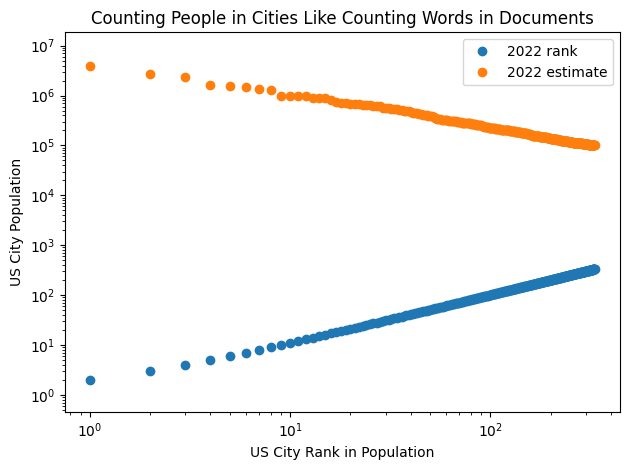

In [30]:

rankpop = df[[df.columns[0], df.columns[3]]]
axes = rankpop.plot(style='o', logx=True, logy=True)
xlabel = plt.xlabel('US City Rank in Population')
ylabel = plt.ylabel('US City Population')
plt.title('Counting People in Cities Like Counting Words in Documents')
plt.tight_layout()
plt.show()


In [35]:
DATA_DIR = ('https://gitlab.com/tangibleai/nlpia/-/raw/master/src/nlpia/data')
url = DATA_DIR + '/bias_discrimination.txt'
bias_discrimination = requests.get(url).content.decode()
intro_tokens = [token.text for token in nlp(bias_intro.lower())]
disc_tokens = [token.text for token in nlp(bias_discrimination.lower())]
intro_total = len(intro_tokens)
intro_total

NameError: ignored

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [58]:
corpus = [doc.text for doc in corpus]

In [59]:
vectorizer = TfidfVectorizer(min_df=1)
model = vectorizer.fit_transform(corpus)
print(model.todense().round(2))

[[0.   0.   0.   ... 0.   0.   0.  ]
 [0.   0.   0.   ... 0.   0.   0.  ]
 [0.   0.   0.   ... 0.   0.   0.  ]
 ...
 [0.   0.   0.   ... 0.   0.   0.  ]
 [0.   0.   0.   ... 0.   0.   0.  ]
 [0.   0.   0.   ... 0.19 0.   0.  ]]


In [62]:
DS_FAQ_URL = ('https://gitlab.com/tangibleai/qary/-/raw/main/src/qary/data/faq/faq-python-data-science-cleaned.csv')

In [63]:
qa_dataset = pd.read_csv(DS_FAQ_URL)

In [65]:
qa_dataset

,question,answer
0,How to detect outliers in a data set and how t...,"Like other pipeline design challenges, I do ou..."
1,What is a static model or distribution?,A probability distribution or model whose unde...


In [66]:
import pandas as pd
pd.options.display.width = 120

DATA_DIR = ('https://gitlab.com/tangibleai/nlpia/-/raw/master/src/nlpia/data')
url= DATA_DIR + '/toxic_comment_small.csv'



In [67]:
comments = pd.read_csv(url)


In [68]:
comments.head()

,text,toxic
0,you have yet to identify where my edits violat...,0
1,"""\n as i have already said,wp:rfc or wp:ani. (...",0
2,your vote on wikiquote simple english when it ...,0
3,your stalking of my edits i've opened a thread...,0
4,straight from the smear site itself. the perso...,1


In [77]:
index = ['comment{}{}'.format(i, '!'*j) for (i,j) in zip(range(len(comments)), comments.toxic)]


In [74]:
comments.toxic

0       0
1       0
2       0
3       0
4       1
       ..
4995    0
4996    0
4997    1
4998    1
4999    0
Name: toxic, Length: 5000, dtype: int64

In [79]:
comments = pd.DataFrame(comments.values, columns=comments.columns, index=index)


In [81]:
mask = comments.toxic.astype(bool).values


In [83]:
comments['toxic'] = comments.toxic.astype(int)
len(comments)
comments.toxic.sum()
comments.head(6)

,text,toxic
comment0,you have yet to identify where my edits violat...,0
comment1,"""\n as i have already said,wp:rfc or wp:ani. (...",0
comment2,your vote on wikiquote simple english when it ...,0
comment3,your stalking of my edits i've opened a thread...,0
comment4!,straight from the smear site itself. the perso...,1
comment5,"no, i can't see it either - and i've gone back...",0


In [84]:
comments.toxic.sum()

650

In [85]:
from sklearn.feature_extraction.text import TfidfVectorizer
import spacy
nlp = spacy.load("en_core_web_sm")

In [86]:
def spacy_tokenize(sentence):
  return [token.text for token in nlp(sentence.lower())]

In [87]:
tfidf_model = TfidfVectorizer(tokenizer=spacy_tokenize)

In [88]:
tfidf_docs = tfidf_model.fit_transform(raw_documents=comments.text).toarray()

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [89]:
mask = comments.toxic.astype(bool).values

In [90]:
mask

array([False, False, False, ...,  True,  True, False])

In [91]:
toxic_centroid = tfidf_docs[mask].mean(axis=0)

In [93]:
nontoxic_centroid = tfidf_docs[~mask].mean(axis=0)

In [94]:
nontoxic_centroid

array([1.89710535e-02, 4.58793799e-03, 2.57451586e-04, ...,
       2.47852092e-05, 1.78452160e-05, 6.71831573e-05])

In [95]:
centroid_axis = toxic_centroid - nontoxic_centroid
toxicity_score = tfidf_docs.dot(centroid_axis)
toxicity_score.round(3)

array([-0.008, -0.022, -0.014, ..., -0.025, -0.001, -0.022])

In [96]:
from sklearn.preprocessing import MinMaxScaler
comments['manual_score'] = MinMaxScaler().fit_transform(toxicity_score.reshape(-1,1))
comments['manual_predict'] = (comments.manual_score > .5).astype(int)
comments['toxic manual_predict manual_score'.split()].round(2).head(6)


,toxic,manual_predict,manual_score
comment0,0,0,0.41
comment1,0,0,0.27
comment2,0,0,0.35
comment3,0,0,0.47
comment4!,1,0,0.48
comment5,0,0,0.31


In [98]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda_tfidf = LDA(n_components=1)
lda_tfidf = lda_tfidf.fit(tfidf_docs, comments['toxic'])
comments['tfidf_predict'] = lda_tfidf.predict(tfidf_docs)
round(float(lda_tfidf.score(tfidf_docs, comments['toxic'])), 3)

0.999

In [99]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(tfidf_docs,comments.toxic.values, test_size=0.5, random_state=271828)
lda_tfidf = LDA(n_components=1)
lda = lda_tfidf.fit(X_train, y_train)
round(float(lda.score(X_train, y_train)), 3)



0.999

In [109]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

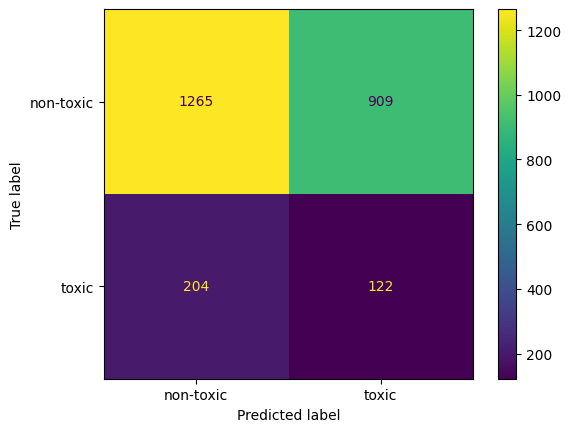

In [111]:
cm = confusion_matrix(y_test, lda.predict(X_test))

# Plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['non-toxic', 'toxic'])
disp.plot()

In [123]:
import pandas as pd
pd.set_option('display.max_columns', 6)
from sklearn.decomposition import PCA
import seaborn
from matplotlib import pyplot as plt

DATA_DIR = ('https://gitlab.com/tangibleai/nlpia/-/raw/master/src/nlpia/data')
df = pd.read_csv(DATA_DIR + '/pointcloud.csv.gz', index_col=0)


pca = PCA(n_components=2)
df2d = pd.DataFrame(pca.fit_transform(df), columns=list('xy'))
df2d.plot(kind='scatter', x='x', y='y')
plt.show()

ImportError: ignored

In [122]:
!pip  install -U scikit-learn

In [118]:
skdec.pca

AttributeError: ignored

In [126]:
REPO_URL = 'https://gitlab.com/tangibleai/qary/-/raw/main'
FAQ_DIR = 'src/qary/data/faq'
FAQ_FILENAME = 'short-faqs.csv'
DS_FAQ_URL = '/'.join([REPO_URL, FAQ_DIR, FAQ_FILENAME])
df = pd.read_csv(DS_FAQ_URL)

In [127]:
df

,question,answer
0,What kinds of data can a machine learning mode...,Machine learning models can only train on nume...
1,What are the basic variable data types in python?,"`float`, `int`, `str`, and `bool`"
2,What is a static model or distribution?,A probability distribution or model whose unde...
3,What is a leverage plot and what should I look...,I don't know.
4,What are replicants in the context of bootstra...,I don't know but I imagine they are the duplic...
...,...,...
67,What do I need to create a natural language pi...,You need a collection of texts labeled with wh...
68,Can I use a collection of YouTube comments to ...,Only if you have a numerical or categorical ra...
69,How can I count the number of records for a pa...,"`[(country, len(group)) for country, group df...."
70,What is a CDF (Cumulative Distribution Functio...,To estimate the probability or confidence inte...


In [130]:
from sklearn.decomposition import TruncatedSVD

vectorizer = TfidfVectorizer()
vectorizer.fit(df['question'])
tfidfvectors = vectorizer.transform(df['question'])
svd = TruncatedSVD(n_components=16, n_iterations=100)
tfidfvectors_16d = svd.fit_transform(tfidfvectors)

def bot_reply(question):
  question_tfidf = vectorizer.transform([question]).todense()
  question_16d = svd.transform(question_tfidf)
  idx = question_16d.dot(tfidfvectors_16d.T).argmax()
  print(
    f"Your question:\n {question}\n\n"
    f"Most similar FAQ question:\n {df['question'][idx]}\n\n"
    f"Answer to that FAQ question:\n {df['answer'][idx]}\n\n"
  )

ImportError: ignored